In [1]:
# Read data
import pandas as pd
import pandas_profiling as pdp
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("train:", train.shape)
print("test:", test.shape)

train: (59381, 128)
test: (19765, 127)


In [2]:
# Check data
print(train.columns.to_numpy())
#pdp.ProfileReport(train)

['Id' 'Product_Info_1' 'Product_Info_2' 'Product_Info_3' 'Product_Info_4'
 'Product_Info_5' 'Product_Info_6' 'Product_Info_7' 'Ins_Age' 'Ht' 'Wt'
 'BMI' 'Employment_Info_1' 'Employment_Info_2' 'Employment_Info_3'
 'Employment_Info_4' 'Employment_Info_5' 'Employment_Info_6'
 'InsuredInfo_1' 'InsuredInfo_2' 'InsuredInfo_3' 'InsuredInfo_4'
 'InsuredInfo_5' 'InsuredInfo_6' 'InsuredInfo_7' 'Insurance_History_1'
 'Insurance_History_2' 'Insurance_History_3' 'Insurance_History_4'
 'Insurance_History_5' 'Insurance_History_7' 'Insurance_History_8'
 'Insurance_History_9' 'Family_Hist_1' 'Family_Hist_2' 'Family_Hist_3'
 'Family_Hist_4' 'Family_Hist_5' 'Medical_History_1' 'Medical_History_2'
 'Medical_History_3' 'Medical_History_4' 'Medical_History_5'
 'Medical_History_6' 'Medical_History_7' 'Medical_History_8'
 'Medical_History_9' 'Medical_History_10' 'Medical_History_11'
 'Medical_History_12' 'Medical_History_13' 'Medical_History_14'
 'Medical_History_15' 'Medical_History_16' 'Medical_History_17'

In [3]:
# Split x and y
x = train.iloc[:,1:-1]
y = train['Response']
print(y.value_counts())

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64


In [4]:
# One-hot encode categorical data 
x = pd.get_dummies(x)
x.shape

(59381, 144)

In [5]:
# Normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,-0.164525,-2.841731,-0.891949,-0.083689,-2.264385,-0.149284,1.197962,-1.690031,-1.617886,-1.198363,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,-0.344081,1.773817,-0.471817,-0.216001
1,-0.164525,0.312319,-0.891949,-0.083689,0.441621,-0.149284,-1.753982,-1.445119,-1.805858,-1.613382,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,-0.344081,-0.563756,-0.471817,-0.216001
2,-0.164525,0.312319,-0.891949,-0.083689,0.441621,-0.149284,-1.905363,0.514174,-0.043622,-0.332879,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,-0.344081,-0.563756,-0.471817,4.629613
3,-0.164525,-2.841731,0.559979,-0.083689,0.441621,-0.149284,-1.224146,-0.465473,-0.983481,-0.957553,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,-0.344081,-0.563756,2.119467,-0.216001
4,-0.164525,0.312319,-0.347476,-0.083689,0.441621,-0.149284,0.062599,-0.710384,-0.654530,-0.371621,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,2.906295,-0.563756,-0.471817,-0.216001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,-0.164525,-2.841731,-0.347476,-0.083689,0.441621,-0.149284,-1.678291,0.024351,0.308826,0.406188,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,2.839061,-0.344081,-0.563756,-0.471817,-0.216001
59377,-0.164525,0.312319,-0.347476,-0.083689,0.441621,-0.149284,0.138290,1.248909,1.248685,0.668157,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,-0.344081,1.773817,-0.471817,-0.216001
59378,-0.164525,0.312319,-0.891949,-0.083689,0.441621,-0.149284,-1.526909,0.514174,-0.513551,-0.887749,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,-0.344081,-0.563756,-0.471817,4.629613
59379,-0.164525,-2.841731,-0.347476,-0.083689,0.441621,-0.149284,0.516744,-0.220561,-0.184601,-0.057360,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,2.906295,-0.563756,-0.471817,-0.216001


In [6]:
# Complete missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)
x

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,-0.164525,-2.841731,-0.891949,-0.083689,-2.264385,-0.149284,1.197962,-1.690031,-1.617886,-1.198363,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,-0.344081,1.773817,-0.471817,-0.216001
1,-0.164525,0.312319,-0.891949,-0.083689,0.441621,-0.149284,-1.753982,-1.445119,-1.805858,-1.613382,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,-0.344081,-0.563756,-0.471817,-0.216001
2,-0.164525,0.312319,-0.891949,-0.083689,0.441621,-0.149284,-1.905363,0.514174,-0.043622,-0.332879,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,-0.344081,-0.563756,-0.471817,4.629613
3,-0.164525,-2.841731,0.559979,-0.083689,0.441621,-0.149284,-1.224146,-0.465473,-0.983481,-0.957553,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,-0.344081,-0.563756,2.119467,-0.216001
4,-0.164525,0.312319,-0.347476,-0.083689,0.441621,-0.149284,0.062599,-0.710384,-0.654530,-0.371621,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,2.906295,-0.563756,-0.471817,-0.216001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,-0.164525,-2.841731,-0.347476,-0.083689,0.441621,-0.149284,-1.678291,0.024351,0.308826,0.406188,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,2.839061,-0.344081,-0.563756,-0.471817,-0.216001
59377,-0.164525,0.312319,-0.347476,-0.083689,0.441621,-0.149284,0.138290,1.248909,1.248685,0.668157,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,-0.344081,1.773817,-0.471817,-0.216001
59378,-0.164525,0.312319,-0.891949,-0.083689,0.441621,-0.149284,-1.526909,0.514174,-0.513551,-0.887749,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,-0.344081,-0.563756,-0.471817,4.629613
59379,-0.164525,-2.841731,-0.347476,-0.083689,0.441621,-0.149284,0.516744,-0.220561,-0.184601,-0.057360,...,-0.138776,-0.069445,-0.051978,-0.071971,-0.060842,-0.352229,2.906295,-0.563756,-0.471817,-0.216001


In [7]:
# Preprocess test data
z = test.iloc[:,1:]
z = pd.get_dummies(z)
z = pd.DataFrame(scaler.transform(z), columns=z.columns)
z = pd.DataFrame(imputer.transform(z), columns=z.columns)

In [8]:
# Split train data and test data
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=0)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(44535, 144) (14846, 144) (44535,) (14846,)


In [9]:
# SVM (grid search)
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

param = {'C': [5, 10, 20], 'dual': [False], 'penalty': ['l1', 'l2']}
gscv = GridSearchCV(LinearSVC(), param, cv=4, verbose=2)
gscv.fit(x, y)

result = pd.DataFrame.from_dict(gscv.cv_results_)
result

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] C=5, dual=False, penalty=l1 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.1min remaining:    0.0s


[CV] ...................... C=5, dual=False, penalty=l1, total= 3.1min
[CV] C=5, dual=False, penalty=l1 .....................................


c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...................... C=5, dual=False, penalty=l1, total= 2.9min
[CV] C=5, dual=False, penalty=l1 .....................................


c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...................... C=5, dual=False, penalty=l1, total= 3.3min
[CV] C=5, dual=False, penalty=l1 .....................................


c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...................... C=5, dual=False, penalty=l1, total= 2.9min
[CV] C=5, dual=False, penalty=l2 .....................................
[CV] ...................... C=5, dual=False, penalty=l2, total=  21.6s
[CV] C=5, dual=False, penalty=l2 .....................................
[CV] ...................... C=5, dual=False, penalty=l2, total=  22.0s
[CV] C=5, dual=False, penalty=l2 .....................................
[CV] ...................... C=5, dual=False, penalty=l2, total=  24.1s
[CV] C=5, dual=False, penalty=l2 .....................................
[CV] ...................... C=5, dual=False, penalty=l2, total=  23.9s
[CV] C=10, dual=False, penalty=l1 ....................................


c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..................... C=10, dual=False, penalty=l1, total= 3.2min
[CV] C=10, dual=False, penalty=l1 ....................................


c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..................... C=10, dual=False, penalty=l1, total= 2.7min
[CV] C=10, dual=False, penalty=l1 ....................................


c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..................... C=10, dual=False, penalty=l1, total= 2.6min
[CV] C=10, dual=False, penalty=l1 ....................................


c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..................... C=10, dual=False, penalty=l1, total= 3.0min
[CV] C=10, dual=False, penalty=l2 ....................................
[CV] ..................... C=10, dual=False, penalty=l2, total=  21.9s
[CV] C=10, dual=False, penalty=l2 ....................................
[CV] ..................... C=10, dual=False, penalty=l2, total=  21.8s
[CV] C=10, dual=False, penalty=l2 ....................................
[CV] ..................... C=10, dual=False, penalty=l2, total=  20.7s
[CV] C=10, dual=False, penalty=l2 ....................................
[CV] ..................... C=10, dual=False, penalty=l2, total=  22.6s
[CV] C=20, dual=False, penalty=l1 ....................................


c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..................... C=20, dual=False, penalty=l1, total= 2.6min
[CV] C=20, dual=False, penalty=l1 ....................................


c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..................... C=20, dual=False, penalty=l1, total= 2.7min
[CV] C=20, dual=False, penalty=l1 ....................................


c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..................... C=20, dual=False, penalty=l1, total= 2.6min
[CV] C=20, dual=False, penalty=l1 ....................................


c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..................... C=20, dual=False, penalty=l1, total= 3.5min
[CV] C=20, dual=False, penalty=l2 ....................................
[CV] ..................... C=20, dual=False, penalty=l2, total=  22.0s
[CV] C=20, dual=False, penalty=l2 ....................................
[CV] ..................... C=20, dual=False, penalty=l2, total=  21.4s
[CV] C=20, dual=False, penalty=l2 ....................................
[CV] ..................... C=20, dual=False, penalty=l2, total=  21.7s
[CV] C=20, dual=False, penalty=l2 ....................................
[CV] ..................... C=20, dual=False, penalty=l2, total=  22.6s


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 39.5min finished
c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_dual,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,182.094092,9.551927,0.011709,0.012942,5,False,l1,"{'C': 5, 'dual': False, 'penalty': 'l1'}",0.506197,0.505086,0.506096,0.503402,0.505195,0.001123,1
1,22.900598,1.117092,0.015620,0.000002,5,False,l2,"{'C': 5, 'dual': False, 'penalty': 'l2'}",0.505928,0.505019,0.506096,0.503402,0.505111,0.001069,6
2,172.657610,14.278640,0.011716,0.006764,10,False,l1,"{'C': 10, 'dual': False, 'penalty': 'l1'}",0.506130,0.505019,0.506096,0.503334,0.505145,0.001137,3
3,21.705806,0.693742,0.011719,0.006766,10,False,l2,"{'C': 10, 'dual': False, 'penalty': 'l2'}",0.505928,0.505086,0.506096,0.503402,0.505128,0.001068,4
4,171.321836,23.387452,0.007803,0.007803,20,False,l1,"{'C': 20, 'dual': False, 'penalty': 'l1'}",0.506062,0.505019,0.506096,0.503402,0.505145,0.001096,2
5,21.897235,0.451046,0.011716,0.006764,20,False,l2,"{'C': 20, 'dual': False, 'penalty': 'l2'}",0.505928,0.505086,0.506096,0.503402,0.505128,0.001068,4


In [10]:
# SVM (train)
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(C=10, penalty='l1', dual=False)
svm_clf.fit(x, y)

c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

In [11]:
import pickle

# Save model
filename = 'svm_clf.bin'
pickle.dump(svm_clf, open(filename, 'wb'))

# Load model
#model = pickle.load(open(filename, 'rb'))

In [12]:
# Random forest (grid search)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

param = {
    "n_estimators":[50,75,100],
    "criterion":["gini","entropy"],
    "max_depth":[15,20,25],
    "random_state":[0],
}
gscv = GridSearchCV(RandomForestClassifier(), param, cv=4, verbose=2)
gscv.fit(x, y)

result = pd.DataFrame.from_dict(gscv.cv_results_)
result

Fitting 4 folds for each of 18 candidates, totalling 72 fits
[CV] criterion=gini, max_depth=15, n_estimators=50, random_state=0 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=15, n_estimators=50, random_state=0, total=   4.1s
[CV] criterion=gini, max_depth=15, n_estimators=50, random_state=0 ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=15, n_estimators=50, random_state=0, total=   4.1s
[CV] criterion=gini, max_depth=15, n_estimators=50, random_state=0 ...
[CV]  criterion=gini, max_depth=15, n_estimators=50, random_state=0, total=   3.9s
[CV] criterion=gini, max_depth=15, n_estimators=50, random_state=0 ...
[CV]  criterion=gini, max_depth=15, n_estimators=50, random_state=0, total=   3.9s
[CV] criterion=gini, max_depth=15, n_estimators=75, random_state=0 ...
[CV]  criterion=gini, max_depth=15, n_estimators=75, random_state=0, total=   6.3s
[CV] criterion=gini, max_depth=15, n_estimators=75, random_state=0 ...
[CV]  criterion=gini, max_depth=15, n_estimators=75, random_state=0, total=   5.9s
[CV] criterion=gini, max_depth=15, n_estimators=75, random_state=0 ...
[CV]  criterion=gini, max_depth=15, n_estimators=75, random_state=0, total=   5.9s
[CV] criterion=gini, max_depth=15, n_estimators=75, random_state=0 ...
[CV]  criterion=gini, max_depth=15, n_estimators=75, random_state=0, total= 

[CV]  criterion=entropy, max_depth=20, n_estimators=75, random_state=0, total=  12.7s
[CV] criterion=entropy, max_depth=20, n_estimators=75, random_state=0 
[CV]  criterion=entropy, max_depth=20, n_estimators=75, random_state=0, total=  11.6s
[CV] criterion=entropy, max_depth=20, n_estimators=100, random_state=0 
[CV]  criterion=entropy, max_depth=20, n_estimators=100, random_state=0, total=  17.3s
[CV] criterion=entropy, max_depth=20, n_estimators=100, random_state=0 
[CV]  criterion=entropy, max_depth=20, n_estimators=100, random_state=0, total=  15.6s
[CV] criterion=entropy, max_depth=20, n_estimators=100, random_state=0 
[CV]  criterion=entropy, max_depth=20, n_estimators=100, random_state=0, total=  14.3s
[CV] criterion=entropy, max_depth=20, n_estimators=100, random_state=0 
[CV]  criterion=entropy, max_depth=20, n_estimators=100, random_state=0, total=  13.3s
[CV] criterion=entropy, max_depth=25, n_estimators=50, random_state=0 
[CV]  criterion=entropy, max_depth=25, n_estimator

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 11.9min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,3.852139,0.083060,0.179726,0.032210,gini,15,50,0,"{'criterion': 'gini', 'max_depth': 15, 'n_esti...",0.559410,0.560189,0.558639,0.556416,0.558664,0.001408,17
1,5.757393,0.194845,0.238235,0.006743,gini,15,75,0,"{'criterion': 'gini', 'max_depth': 15, 'n_esti...",0.561902,0.562883,0.561401,0.561401,0.561897,0.000605,13
2,8.361337,0.540947,0.359300,0.033142,gini,15,100,0,"{'criterion': 'gini', 'max_depth': 15, 'n_esti...",0.562710,0.562748,0.562883,0.561132,0.562368,0.000717,12
3,5.783798,0.652210,0.234329,0.027052,gini,20,50,0,"{'criterion': 'gini', 'max_depth': 20, 'n_esti...",0.565607,0.563355,0.567868,0.563826,0.565164,0.001773,9
4,8.974468,0.721167,0.363205,0.027881,gini,20,75,0,"{'criterion': 'gini', 'max_depth': 20, 'n_esti...",0.568032,0.569485,0.570562,0.563355,0.567858,0.002751,5
5,11.860507,0.753991,0.511605,0.006749,gini,20,100,0,"{'criterion': 'gini', 'max_depth': 20, 'n_esti...",0.569110,0.571371,0.572044,0.568205,0.570182,0.001577,2
6,7.064764,0.429133,0.292892,0.012961,gini,25,50,0,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.566483,0.564904,0.564837,0.561334,0.564389,0.001883,10
7,11.278615,0.050621,0.449117,0.006766,gini,25,75,0,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.568840,0.570967,0.570226,0.563759,0.568448,0.002813,4
8,15.016027,0.072746,0.609230,0.011045,gini,25,100,0,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.571063,0.575076,0.570293,0.567262,0.570923,0.002787,1
9,5.115995,0.458709,0.187456,0.015621,entropy,15,50,0,"{'criterion': 'entropy', 'max_depth': 15, 'n_e...",0.553887,0.554665,0.560458,0.552240,0.555312,0.003097,18


In [14]:
# Random forest (train)
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=25)
rf_clf.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
import pickle

# Save model
filename = 'rf_clf.bin'
pickle.dump(rf_clf, open(filename, 'wb'))

# Load model
#model = pickle.load(open(filename, 'rb'))

In [16]:
# Inference
result = rf_clf.predict(z)
submission = pd.DataFrame({'Id': test['Id'].astype('int').values, 'Response': result})
submission.to_csv('submission_rf.csv', index=False)
submission

,Id,Response
0,1,7
1,3,8
2,4,6
3,9,8
4,12,8
...,...,...
19760,79093,8
19761,79099,8
19762,79102,6
19763,79125,2


In [17]:
# DNN
from tensorflow import keras
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[x.shape[-1]]),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(9, activation='softmax')
    ])
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [18]:
# DNN (fit and validation)
import tensorflow as tf

batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values)).shuffle(len(x_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values)).batch(batch_size)

model = get_model()
fit = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
87/87 [==============================] - 4s 48ms/step - loss: 1.7307 - accuracy: 0.3840 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
87/87 [==============================] - 1s 15ms/step - loss: 1.5006 - accuracy: 0.4699 - val_loss: 1.3422 - val_accuracy: 0.5105
Epoch 3/20
87/87 [==============================] - 1s 15ms/step - loss: 1.4062 - accuracy: 0.5017 - val_loss: 1.2932 - val_accuracy: 0.5341
Epoch 4/20
87/87 [==============================] - 1s 15ms/step - loss: 1.3408 - accuracy: 0.5252 - val_loss: 1.2696 - val_accuracy: 0.5373
Epoch 5/20
87/87 [==============================] - 1s 16ms/step - loss: 1.2959 - accuracy: 0.5444 - val_loss: 1.2684 - val_accuracy: 0.5355
Epoch 6/20
87/87 [==============================] - 1s 16ms/step - loss: 1.2583 - accuracy: 0.5593 - val_loss: 1.2660 - val_accuracy: 0.5418
Epoch 7/20
87/87 [==============================] - 1s 16ms/step - loss: 1.2244 - accuracy: 0.5731 - val_loss: 1.2811 - val_accuracy: 0.5361
Epoch

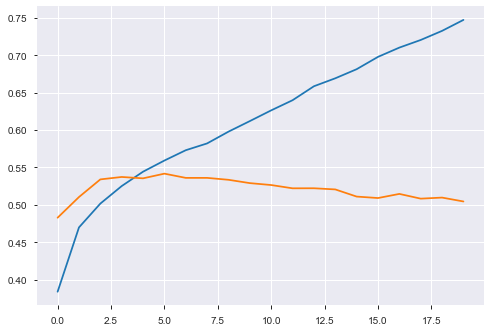

In [19]:
# DNN (accuracy by epoch)
import matplotlib.pyplot as plt

plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.show()

In [20]:
batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices((x.values, y.values)).shuffle(len(x_train)).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((z.values)).batch(batch_size)

# Train
model = get_model()
model.fit(train_ds, epochs=5)

# Inference
result = model.predict(test_ds)
result = [pd.np.argmax(res) for res in result]
submission = pd.DataFrame({'Id': test['Id'].astype('int').values, 'Response': result})
submission.to_csv('submission_dnn.csv', index=False)
submission

Epoch 1/5
116/116 [==============================] - 3s 22ms/step - loss: 1.6828 - accuracy: 0.4111
Epoch 2/5
116/116 [==============================] - 2s 14ms/step - loss: 1.4402 - accuracy: 0.4871
Epoch 3/5
116/116 [==============================] - 2s 14ms/step - loss: 1.3472 - accuracy: 0.5210
Epoch 4/5
116/116 [==============================] - 2s 14ms/step - loss: 1.2986 - accuracy: 0.5380
Epoch 5/5
116/116 [==============================] - 2s 13ms/step - loss: 1.2585 - accuracy: 0.5543


,Id,Response
0,1,1
1,3,6
2,4,6
3,9,8
4,12,8
...,...,...
19760,79093,8
19761,79099,8
19762,79102,6
19763,79125,2


dnn_clf = tf.estimator.DNNClassifier(
    feature_columns=x_train.columns,
    hidden_units=[512, 256, 128, 64, 32],
    n_classes=8)
def input_fn(features, )
dnn_clf.train(input_fn=input_fn)